# Restaurant Data With Consumer Ratings

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (LabelEncoder, PolynomialFeatures,
                                   StandardScaler)
from sklearn.tree import DecisionTreeClassifier

# Загрузка датасетов

In [17]:
r_accepts   = pd.read_csv("../ml/restaurant/chefmozaccepts.csv")
r_cuisine   = pd.read_csv("../ml/restaurant/chefmozcuisine.csv")
r_hours     = pd.read_csv("../ml/restaurant/chefmozhours4.csv")
r_parking   = pd.read_csv("../ml/restaurant/chefmozparking.csv")
r_geoplaces = pd.read_csv("../ml/restaurant/geoplaces2.csv")
u_cuisine   = pd.read_csv("../ml/restaurant/usercuisine.csv")
u_payment   = pd.read_csv("../ml/restaurant/userpayment.csv")
u_profile   = pd.read_csv("../ml/restaurant/userprofile.csv")
rating      = pd.read_csv("../ml/restaurant/rating_final.csv")

# Анализ

In [18]:
def drawPie(data: pd.Series, nTop: int = -1):
    counts = data.value_counts()
    top = counts.nlargest(nTop if nTop > 0 else len(counts))
    other = counts.sum() - top.sum()

    if other > 0:
        plt.pie(list(top.values) + [other], labels=list(top.index) + ["Other"], autopct="%1.1f%%")
    else:
        plt.pie(list(top.values), labels=list(top.index), autopct="%1.1f%%")
    plt.show()

## chefmozaccepts.csv

In [19]:
r_accepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   1314 non-null   int64 
 1   Rpayment  1314 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.7+ KB


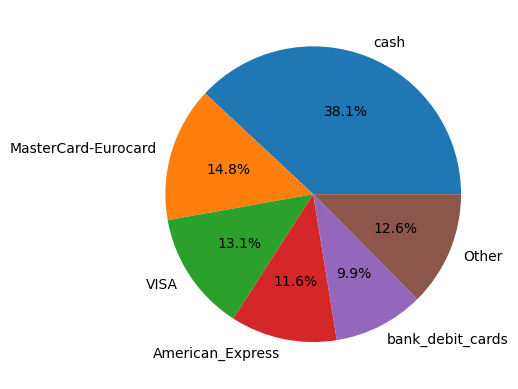

In [20]:
drawPie(r_accepts["Rpayment"], 5)

Большая часть заказов оплачена наличными

## chefmozcuisine.csv

In [21]:
r_cuisine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


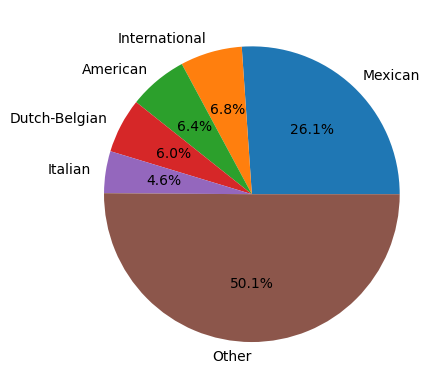

In [22]:
drawPie(r_cuisine["Rcuisine"], 5)

Самая популярная кухня - мексиканская

## chefmozhours4.csv

In [23]:
r_hours.info()
r_hours

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   placeID  2339 non-null   int64 
 1   hours    2339 non-null   object
 2   days     2339 non-null   object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB


,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;
...,...,...,...
2334,132012,12:00-22:00;,Sun;
2335,132012,12:00-22:00;,Mon;Tue;Wed;Thu;Fri;
2336,132012,12:00-22:00;,Mon;Tue;Wed;Thu;Fri;
2337,132012,12:00-22:00;,Sat;


## chefmozparking.csv

In [24]:
r_parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   placeID      702 non-null    int64 
 1   parking_lot  702 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


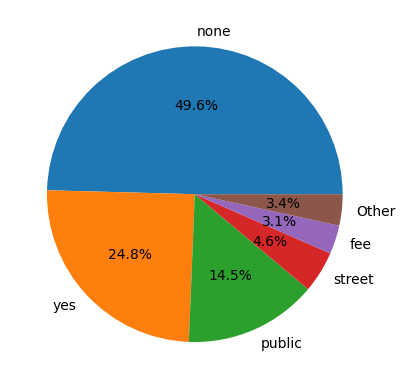

In [25]:
drawPie(r_parking["parking_lot"], 5)

## geoplaces2.csv

In [26]:
r_geoplaces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   placeID         130 non-null    int64  
 1   latitude        130 non-null    float64
 2   longitude       130 non-null    float64
 3   the_geom_meter  130 non-null    object 
 4   name            130 non-null    object 
 5   address         130 non-null    object 
 6   city            130 non-null    object 
 7   state           130 non-null    object 
 8   country         130 non-null    object 
 9   fax             130 non-null    object 
 10  zip             130 non-null    object 
 11  alcohol         130 non-null    object 
 12  smoking_area    130 non-null    object 
 13  dress_code      130 non-null    object 
 14  accessibility   130 non-null    object 
 15  price           130 non-null    object 
 16  url             130 non-null    object 
 17  Rambience       130 non-null    obj

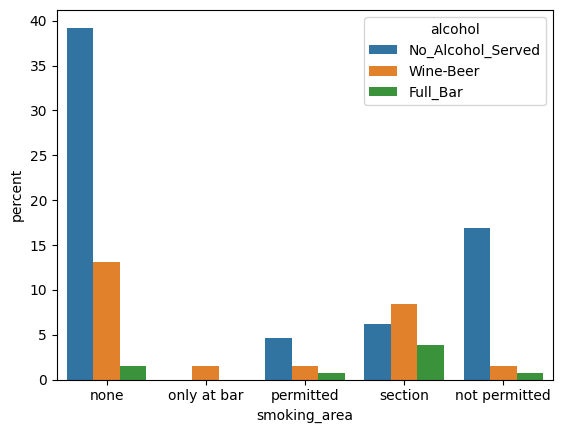

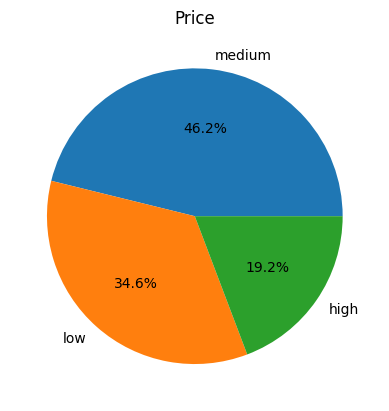

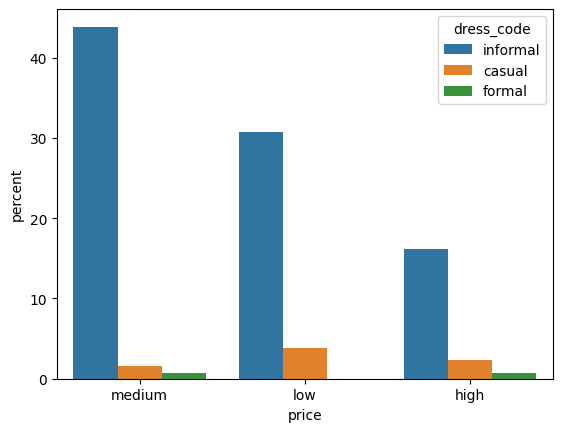

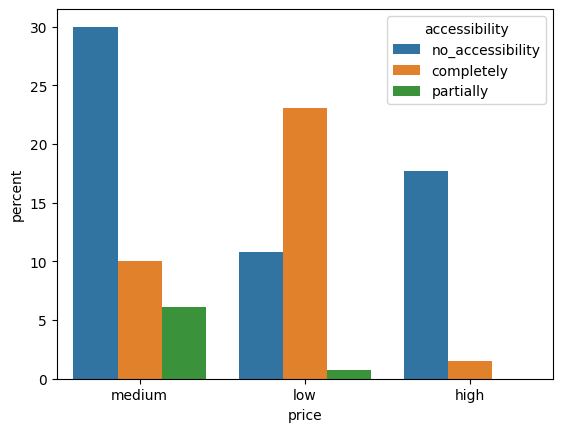

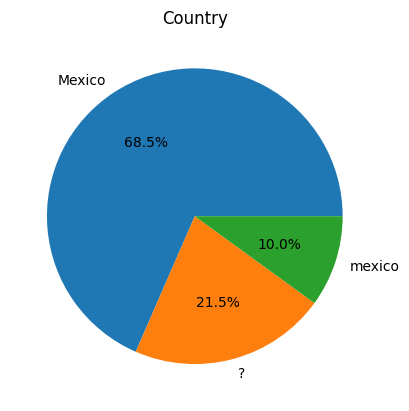

In [27]:
sns.countplot(r_geoplaces, x="smoking_area", hue="alcohol", stat="percent")
plt.show()

plt.title("Price")
drawPie(r_geoplaces["price"])

sns.countplot(r_geoplaces, x="price", hue="dress_code", stat="percent")
plt.show()

sns.countplot(r_geoplaces, x="price", hue="accessibility", stat="percent")
plt.show()

plt.title("Country")
drawPie(r_geoplaces["country"])

## usercuisine.csv

In [28]:
u_cuisine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userID    330 non-null    object
 1   Rcuisine  330 non-null    object
dtypes: object(2)
memory usage: 5.3+ KB


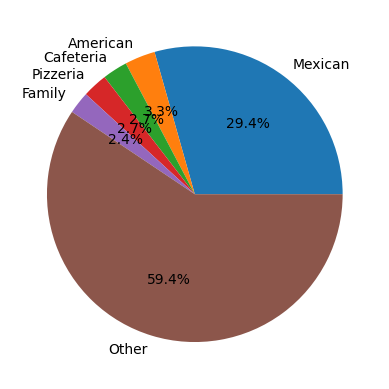

In [29]:
drawPie(u_cuisine["Rcuisine"], 5)

Самая популярная кухня среди посетителей - мексиканская

## userpayment.csv

In [30]:
u_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userID    177 non-null    object
 1   Upayment  177 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


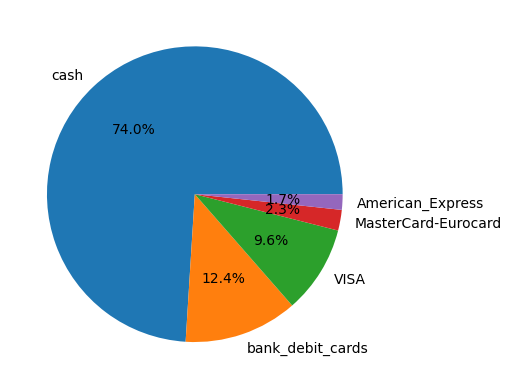

In [31]:
drawPie(u_payment["Upayment"])

Самый популярный вид оплаты среди посетителей - наличными

## userprofile.csv

In [32]:
u_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            138 non-null    object 
 1   latitude          138 non-null    float64
 2   longitude         138 non-null    float64
 3   smoker            138 non-null    object 
 4   drink_level       138 non-null    object 
 5   dress_preference  138 non-null    object 
 6   ambience          138 non-null    object 
 7   transport         138 non-null    object 
 8   marital_status    138 non-null    object 
 9   hijos             138 non-null    object 
 10  birth_year        138 non-null    int64  
 11  interest          138 non-null    object 
 12  personality       138 non-null    object 
 13  religion          138 non-null    object 
 14  activity          138 non-null    object 
 15  color             138 non-null    object 
 16  weight            138 non-null    int64  
 1

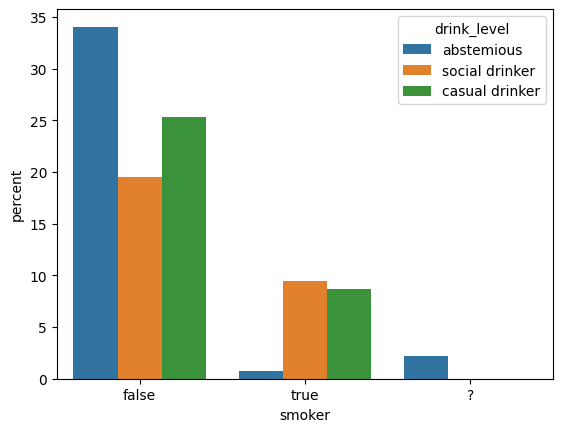

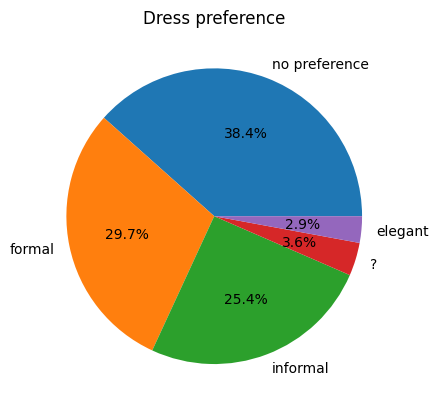

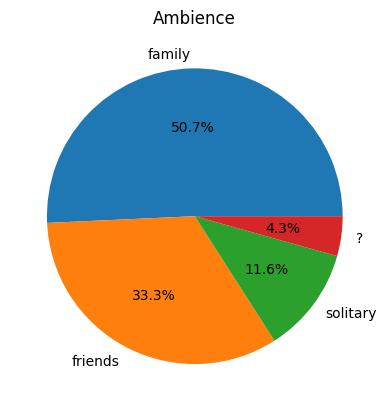

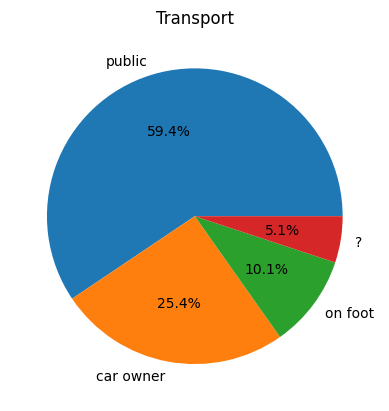

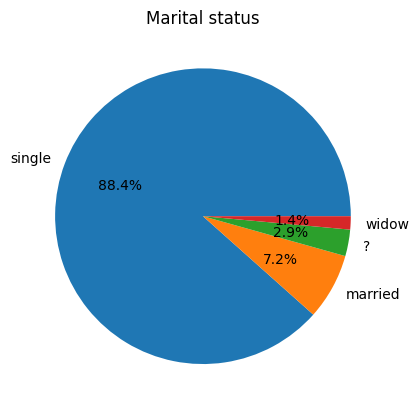

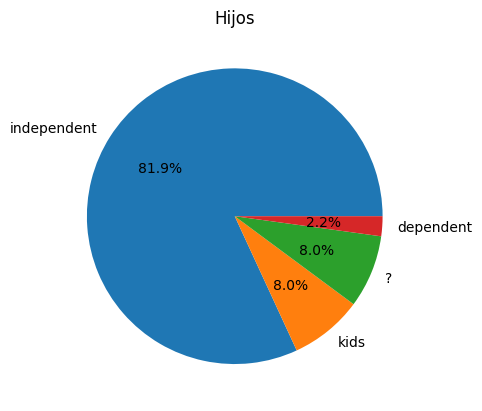

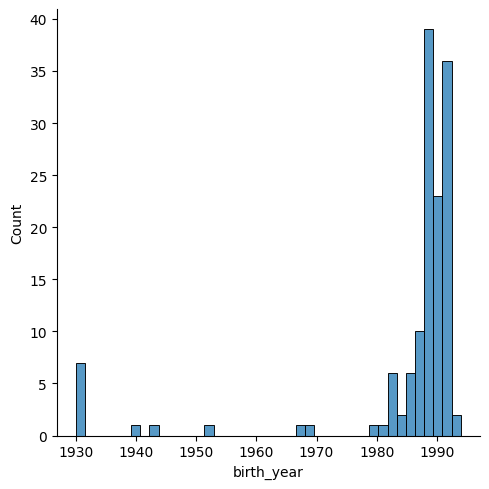

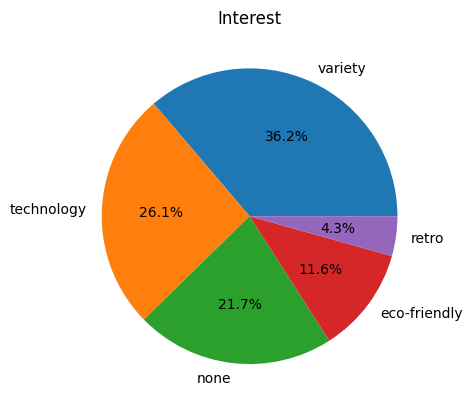

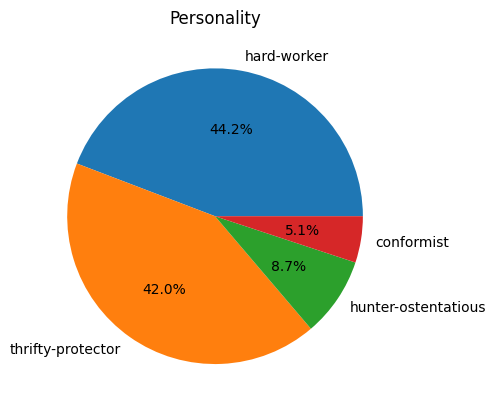

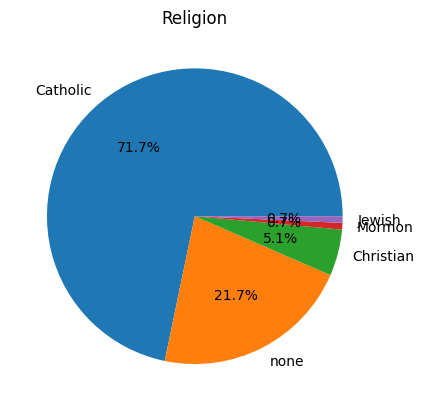

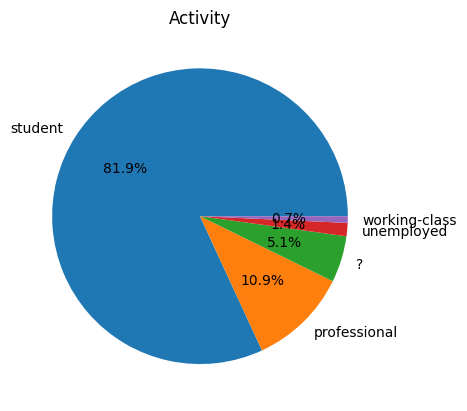

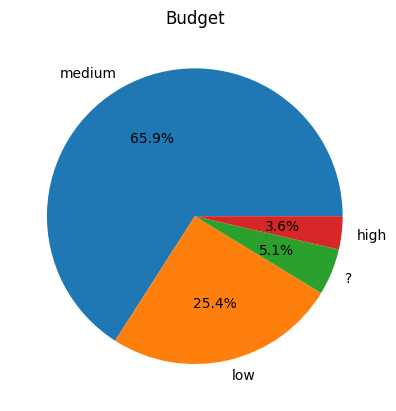

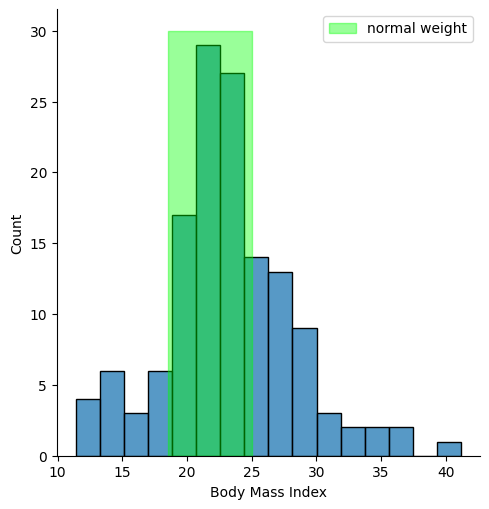

In [33]:
sns.countplot(u_profile, x="smoker", hue="drink_level", stat="percent")
plt.show()

plt.title("Dress preference")
drawPie(u_profile["dress_preference"])

plt.title("Ambience")
drawPie(u_profile["ambience"])

plt.title("Transport")
drawPie(u_profile["transport"])

plt.title("Marital status")
drawPie(u_profile["marital_status"])

plt.title("Hijos")
drawPie(u_profile["hijos"])

sns.displot(u_profile, x="birth_year")
plt.show()

plt.title("Interest")
drawPie(u_profile["interest"])

plt.title("Personality")
drawPie(u_profile["personality"])

plt.title("Religion")
drawPie(u_profile["religion"])

plt.title("Activity")
drawPie(u_profile["activity"])

plt.title("Budget")
drawPie(u_profile["budget"])

bmi = u_profile["weight"] / u_profile["height"] / u_profile["height"]
sns.displot(bmi)
plt.xlabel("Body Mass Index")
plt.fill_betweenx([0, 30], 18.5, 25, color=(0, 1, 0, .4), label="normal weight")
plt.legend()
plt.show()

Большая часть посетителей - студенты. Предпочитают рестораны среднего уровня. Предпочитают общественный транспорт. Нет предпочтений по дресс-коду. Имеют здоровый вес.

## rating_final.csv

In [34]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


<Axes: >

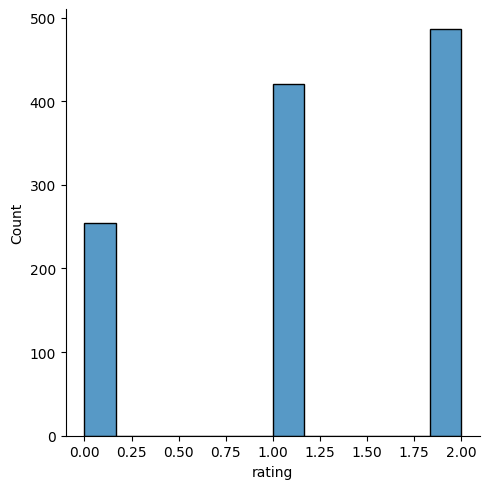

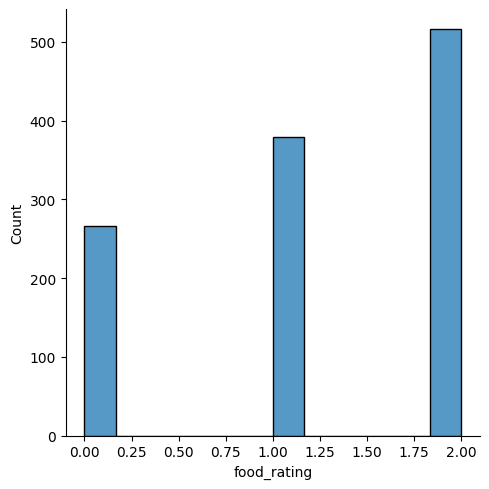

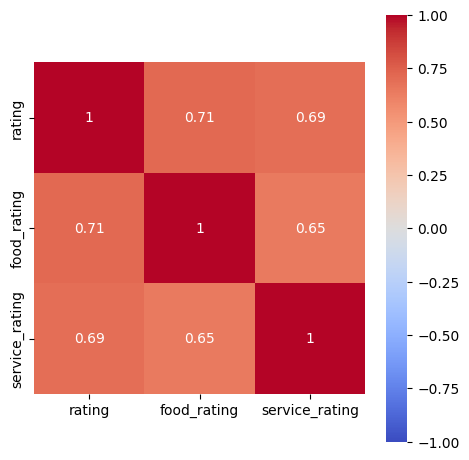

In [35]:
sns.displot(rating, x="rating")
sns.displot(rating, x="food_rating")
sns.displot(rating, x="service_rating")
sns.heatmap(rating[["rating", "food_rating", "service_rating"]].corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True, square=True)

Достаточно высокая корреляция между общим рейтингом, рейтингом еды и сервиса.

In [36]:
ratings = rating.groupby("placeID")[["rating", "food_rating", "service_rating"]].sum().sum(axis=1)
topR = ratings.sort_values()[-5:].index
for r in reversed(topR):
    print(r_geoplaces[r_geoplaces["placeID"] == r][["placeID", "name"]])


     placeID                    name
121   135085  Tortas Locas Hipocampo
   placeID             name
1   132825  puesto de tacos
     placeID                                name
119   135032  Cafeteria y Restaurant El Pacifico
    placeID                    name
65   135052  La Cantina Restaurante
    placeID                   name
60   135038  Restaurant la Chalita


Топ-5 ресторанов по мнению посетителей:
1. Tortas Locas Hipocampo
2. puesto de tacos
3. Cafeteria y Restaurant El Pacifico
4. La Cantina Restaurante
5. Restaurant la Chalita

## Вывод
- Самая популярная кухня - мексиканская. Оно и логично, ведь все рестораны в Мексике
- Наиболее предпочтительный средний и низкий ценовой промежуток
- Наиболее предпочтительный неформальный дресс-код
- В целом можно сделать вывод что рестораны удовлетворяют потребности большей части посетителей
- Есть незначительное количество пропусков в данных (e.g. restaurant url, fax, zip)

#
Данный набор данных описывает связь между ресторанами и их посетителями и даёт оценку того на сколько человеку понравилось то или иное заведение по трём критериям: еда, сервис и общая оценка

Возможна реализация предсказания того на сколько понравится заданному человеку с его предпочтениями заданное заведение  
Данные пользователя + данные ресторана -> возможная оценка того на сколько человеку понравится данное заведение  
Данная модель может быть применима в алгоритме рекомендаций и подбора лучших заведение на основе привычек и предпочтений пользователя

# Обработка данных

## chefmozaccepts.csv

In [37]:
has_cash = r_accepts.groupby("placeID")["Rpayment"].apply(lambda p: "cash" in p.values).reset_index().rename(columns={"Rpayment": "has_cash"})

paymentEncoder = LabelEncoder().fit(r_accepts["Rpayment"])
r_accepts["Rpayment"] = paymentEncoder.transform(r_accepts["Rpayment"])

## chefmozcuisine.csv

In [38]:
has_mexican = r_cuisine.groupby("placeID")["Rcuisine"].apply(lambda c: "Mexican" in c.values).reset_index().rename(columns={"Rcuisine": "has_mexican"})

cuisineEncoder = LabelEncoder().fit(r_cuisine["Rcuisine"])
r_cuisine["Rcuisine"] = cuisineEncoder.transform(r_cuisine["Rcuisine"])

## chefmozhours4.csv

In [39]:
work_weekends = r_hours.groupby("placeID")["days"].sum().str.contains("Sun|Sat").reset_index().rename(columns={"days": "work_weekends"})

Пытался обработать hours в количество рабочих часов, но данные слишком нестандартизируемые

## chefmozparking.csv

In [40]:
has_parking = r_parking.groupby("placeID")["parking_lot"].apply(lambda p: "none" not in p.values).reset_index().rename(columns={"parking_lot": "has_parking"})

parkingEncoder = LabelEncoder().fit(r_parking["parking_lot"])
r_parking["parking_lot"] = parkingEncoder.transform(r_parking["parking_lot"])

## geoplaces2.csv

In [41]:
cities = {
    'Cuernavaca': "Cuernavaca",
    's.l.p.': "San Luis Potosi",
    'San Luis Potosi': "San Luis Potosi",
    'victoria ': "Victoria",
    'victoria': "Victoria",
    'Cd Victoria': "Victoria",
    '?': None,
    'san luis potosi': "San Luis Potosi",
    'Jiutepec': "Jiutepec",
    'cuernavaca': "Cuernavaca",
    'slp': "San Luis Potosi",
    'Soledad': "Soledad",
    'san luis potos': "San Luis Potosi",
    'san luis potosi ': "San Luis Potosi",
    'Ciudad Victoria': "Victoria",
    'Cd. Victoria': "Victoria",
    's.l.p': "San Luis Potosi",
}
r_geoplaces["city"] = r_geoplaces["city"].map(cities)
cityEncoder = LabelEncoder().fit(r_geoplaces["city"])
r_geoplaces["city"] = cityEncoder.transform(r_geoplaces["city"])

In [42]:
states = {
    'Morelos': "Morelos",
    's.l.p.': "San Luis Potosi",
    'San Luis Potosi': "San Luis Potosi",
    'tamaulipas': "Tamaulipas",
    'Tamaulipas': "Tamaulipas",
    'SLP': "San Luis Potosi",
    '?': None,
    'san luis potosi': "San Luis Potosi",
    'morelos': "Morelos",
    'slp': "San Luis Potosi",
    'mexico': "Mexico",
    'san luis potos': "San Luis Potosi",
    'S.L.P.': "San Luis Potosi",
}

r_geoplaces["state"] = r_geoplaces["state"].map(states)
stateEncoder = LabelEncoder().fit(r_geoplaces["state"])
r_geoplaces["state"] = stateEncoder.transform(r_geoplaces["state"])

In [43]:
countries = { 'Mexico': "Mexico", 'mexico': "Mexico", '?': None }
r_geoplaces["country"] = r_geoplaces["country"].map(countries)
countryEncoder = LabelEncoder().fit(r_geoplaces["country"])
r_geoplaces["country"] = countryEncoder.transform(r_geoplaces["country"])

In [44]:
alcoholEncoder = LabelEncoder().fit(r_geoplaces["alcohol"])
r_geoplaces["alcohol"] = alcoholEncoder.transform(r_geoplaces["alcohol"])

In [45]:
r_geoplaces["smoking_area"] = r_geoplaces["smoking_area"].apply(lambda s: s if s != "none" else None)
smokingEncoder = LabelEncoder().fit(r_geoplaces["smoking_area"])
r_geoplaces["smoking_area"] = smokingEncoder.transform(r_geoplaces["smoking_area"])

In [46]:
dressEncoder = LabelEncoder().fit(r_geoplaces["dress_code"])
r_geoplaces["dress_code"] = dressEncoder.transform(r_geoplaces["dress_code"])

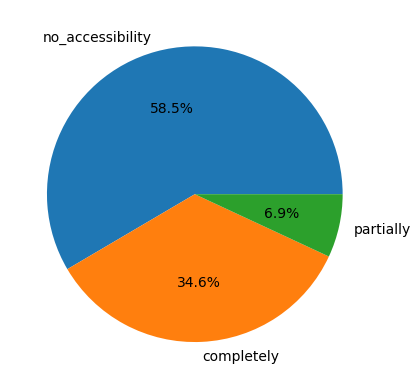

In [47]:
drawPie(r_geoplaces["accessibility"])
r_geoplaces["accessibility"] = r_geoplaces["accessibility"] != "no_accessibility"

In [48]:
priceEncoder = LabelEncoder().fit(r_geoplaces["price"])
r_geoplaces["price"] = priceEncoder.transform(r_geoplaces["price"])

In [49]:
r_geoplaces["url"] = r_geoplaces["url"] != "?"

In [50]:
r_geoplaces["Rambience"] = r_geoplaces["Rambience"] == "quiet"

In [51]:
r_geoplaces["franchise"] = r_geoplaces["franchise"] == "t"

In [52]:
r_geoplaces["area"] = r_geoplaces["area"] == "open"

In [53]:
r_geoplaces["other_services"] = r_geoplaces["other_services"] != "none"

## usercuisine.csv

In [54]:
likes_mexican = u_cuisine.groupby("userID")["Rcuisine"].apply(lambda c: "Mexican" in c.values).reset_index().rename(columns={"Rcuisine": "likes_mexican"})

u_cuisine["Rcuisine"] = cuisineEncoder.fit_transform(u_cuisine["Rcuisine"])

## userpayment.csv

In [55]:
pays_cash = u_payment.groupby("userID")["Upayment"].apply(lambda p: "cash" in p.values).reset_index().rename(columns={"Upayment": "pays_cash"})

u_payment["Upayment"] = paymentEncoder.transform(u_payment["Upayment"])

## userprofile.csv

In [56]:
u_profile["smoker"] = u_profile["smoker"].apply(lambda s: True if s == "true" else False if s == "false" else None)

In [57]:
drinkEncoder = LabelEncoder().fit(u_profile["drink_level"])
u_profile["drink_level"] = drinkEncoder.transform(u_profile["drink_level"])

In [58]:
u_profile["dress_preference"] = u_profile["dress_preference"].apply(lambda d: d if d != "?" else None)
udressEncoder = LabelEncoder().fit(u_profile["dress_preference"])
u_profile["dress_preference"] = udressEncoder.transform(u_profile["dress_preference"])

In [59]:
u_profile["ambience"] = u_profile["ambience"].apply(lambda a: a if a != "?" else None)
ambienceEncoder = LabelEncoder().fit(u_profile["ambience"])
u_profile["ambience"] = ambienceEncoder.transform(u_profile["ambience"])

In [60]:
u_profile["transport"] = u_profile["transport"].apply(lambda a: a if a != "?" else None)
transportEncoder = LabelEncoder().fit(u_profile["transport"])
u_profile["transport"] = transportEncoder.transform(u_profile["transport"])

In [61]:
u_profile["marital_status"] = u_profile["marital_status"].apply(lambda a: a if a != "?" else None)
maritalEncoder = LabelEncoder().fit(u_profile["marital_status"])
u_profile["marital_status"] = maritalEncoder.transform(u_profile["marital_status"])

In [62]:
u_profile["hijos"] = u_profile["hijos"].apply(lambda a: a if a != "?" else None)
hijosEncoder = LabelEncoder().fit(u_profile["hijos"])
u_profile["hijos"] = hijosEncoder.transform(u_profile["hijos"])

In [63]:
birthScaler = StandardScaler().fit(u_profile["birth_year"].to_numpy().reshape((-1, 1)))
u_profile["birth_year"] = birthScaler.transform(u_profile["birth_year"].to_numpy().reshape(-1, 1))

In [64]:
interestEncoder = LabelEncoder().fit(u_profile["interest"])
u_profile["interest"] = interestEncoder.transform(u_profile["interest"])

In [65]:
personalityEncoder = LabelEncoder().fit(u_profile["personality"])
u_profile["personality"] = personalityEncoder.transform(u_profile["personality"])

In [66]:
religionEncoder = LabelEncoder().fit(u_profile["religion"])
u_profile["religion"] = religionEncoder.transform(u_profile["religion"])

In [67]:
u_profile["activity"] = u_profile["activity"].apply(lambda a: a if a != "?" else None)
activityEncoder = LabelEncoder().fit(u_profile["activity"])
u_profile["activity"] = activityEncoder.transform(u_profile["activity"])

In [68]:
colorEncoder = LabelEncoder().fit(u_profile["color"])
u_profile["color"] = colorEncoder.transform(u_profile["color"])

In [69]:
weightScaler = StandardScaler().fit(u_profile["weight"].to_numpy().reshape((-1, 1)))
u_profile["weight"] = weightScaler.transform(u_profile["weight"].to_numpy().reshape(-1, 1))

In [70]:
u_profile["budget"] = u_profile["budget"].apply(lambda b: b if b != "?" else None)
budgetEncoder = LabelEncoder().fit(u_profile["budget"])
u_profile["budget"] = budgetEncoder.transform(u_profile["budget"])

In [71]:
heightScaler = StandardScaler().fit(u_profile["height"].to_numpy().reshape((-1, 1)))
u_profile["height"] = heightScaler.transform(u_profile["height"].to_numpy().reshape(-1, 1))

# Объединение данных

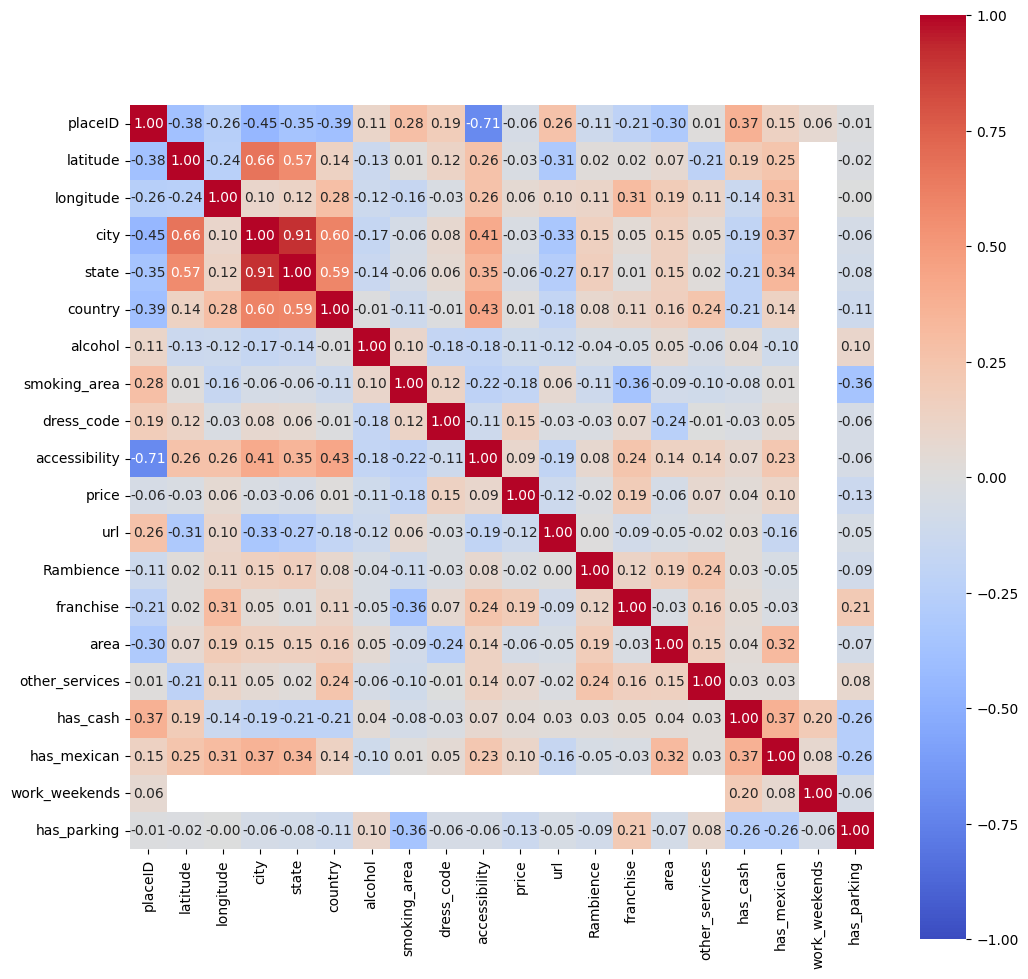

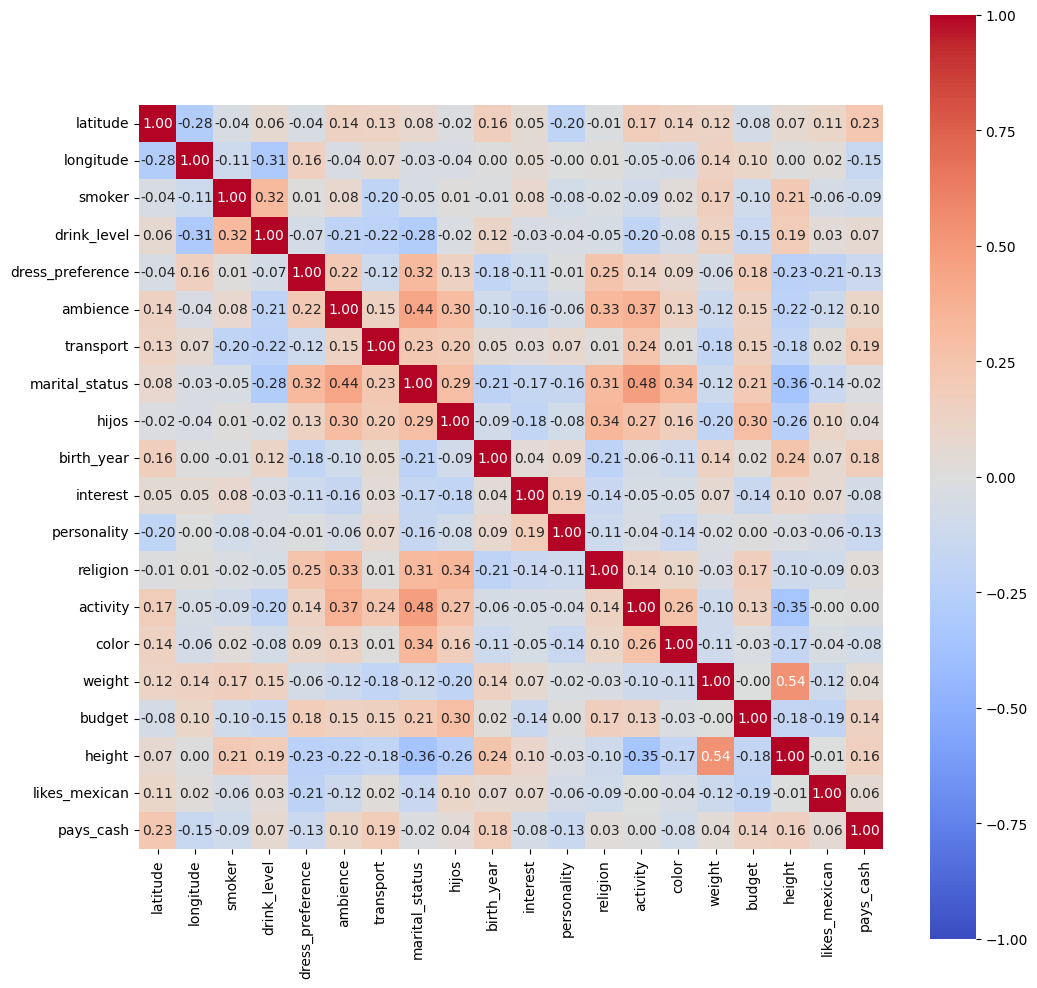

In [72]:
resData = r_geoplaces.merge(has_cash, on="placeID", how="outer").merge(has_mexican, on="placeID", how="outer").merge(work_weekends, on="placeID", how="outer").merge(has_parking, on="placeID", how="outer")
resData.drop(["the_geom_meter", "name", "address", "fax", "zip"], axis=1, inplace=True)

plt.figure(figsize=(12, 12))
sns.heatmap(resData.corr(), vmin=-1, vmax=1, cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

userData = u_profile.merge(likes_mexican, on="userID", how="outer").merge(pays_cash, on="userID", how="outer")
plt.figure(figsize=(12, 12))
sns.heatmap(userData.drop(["userID"], axis=1).corr(), vmin=-1, vmax=1, cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

Как видим из корреляции, city, state и country имеют значительную зависимость, что логично.

In [73]:
resData.drop(["state", "country"], axis=1, inplace=True)

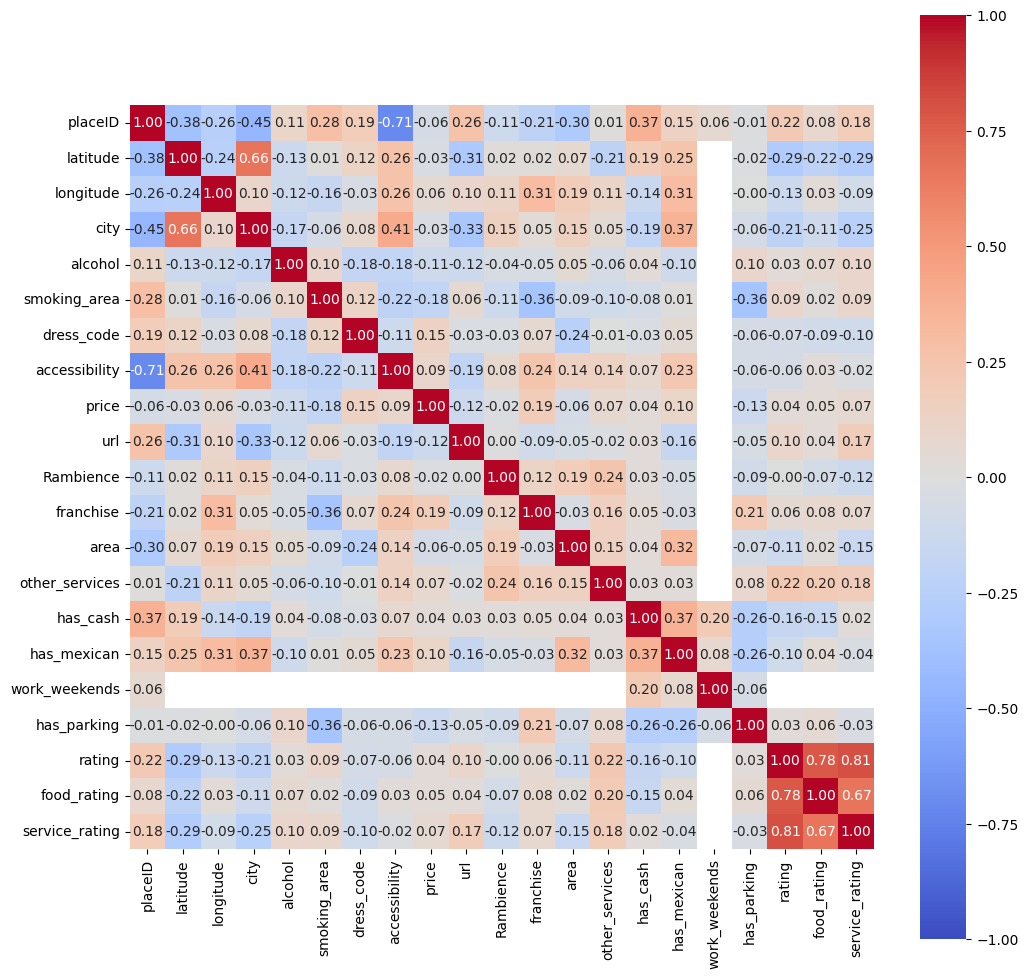

In [74]:
resRating = rating.drop(["userID"], axis=1).groupby("placeID").mean().reset_index()

plt.figure(figsize=(12, 12))
sns.heatmap(resData.merge(resRating, on="placeID", how="outer").corr(), vmin=-1, vmax=1, cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

<Axes: >

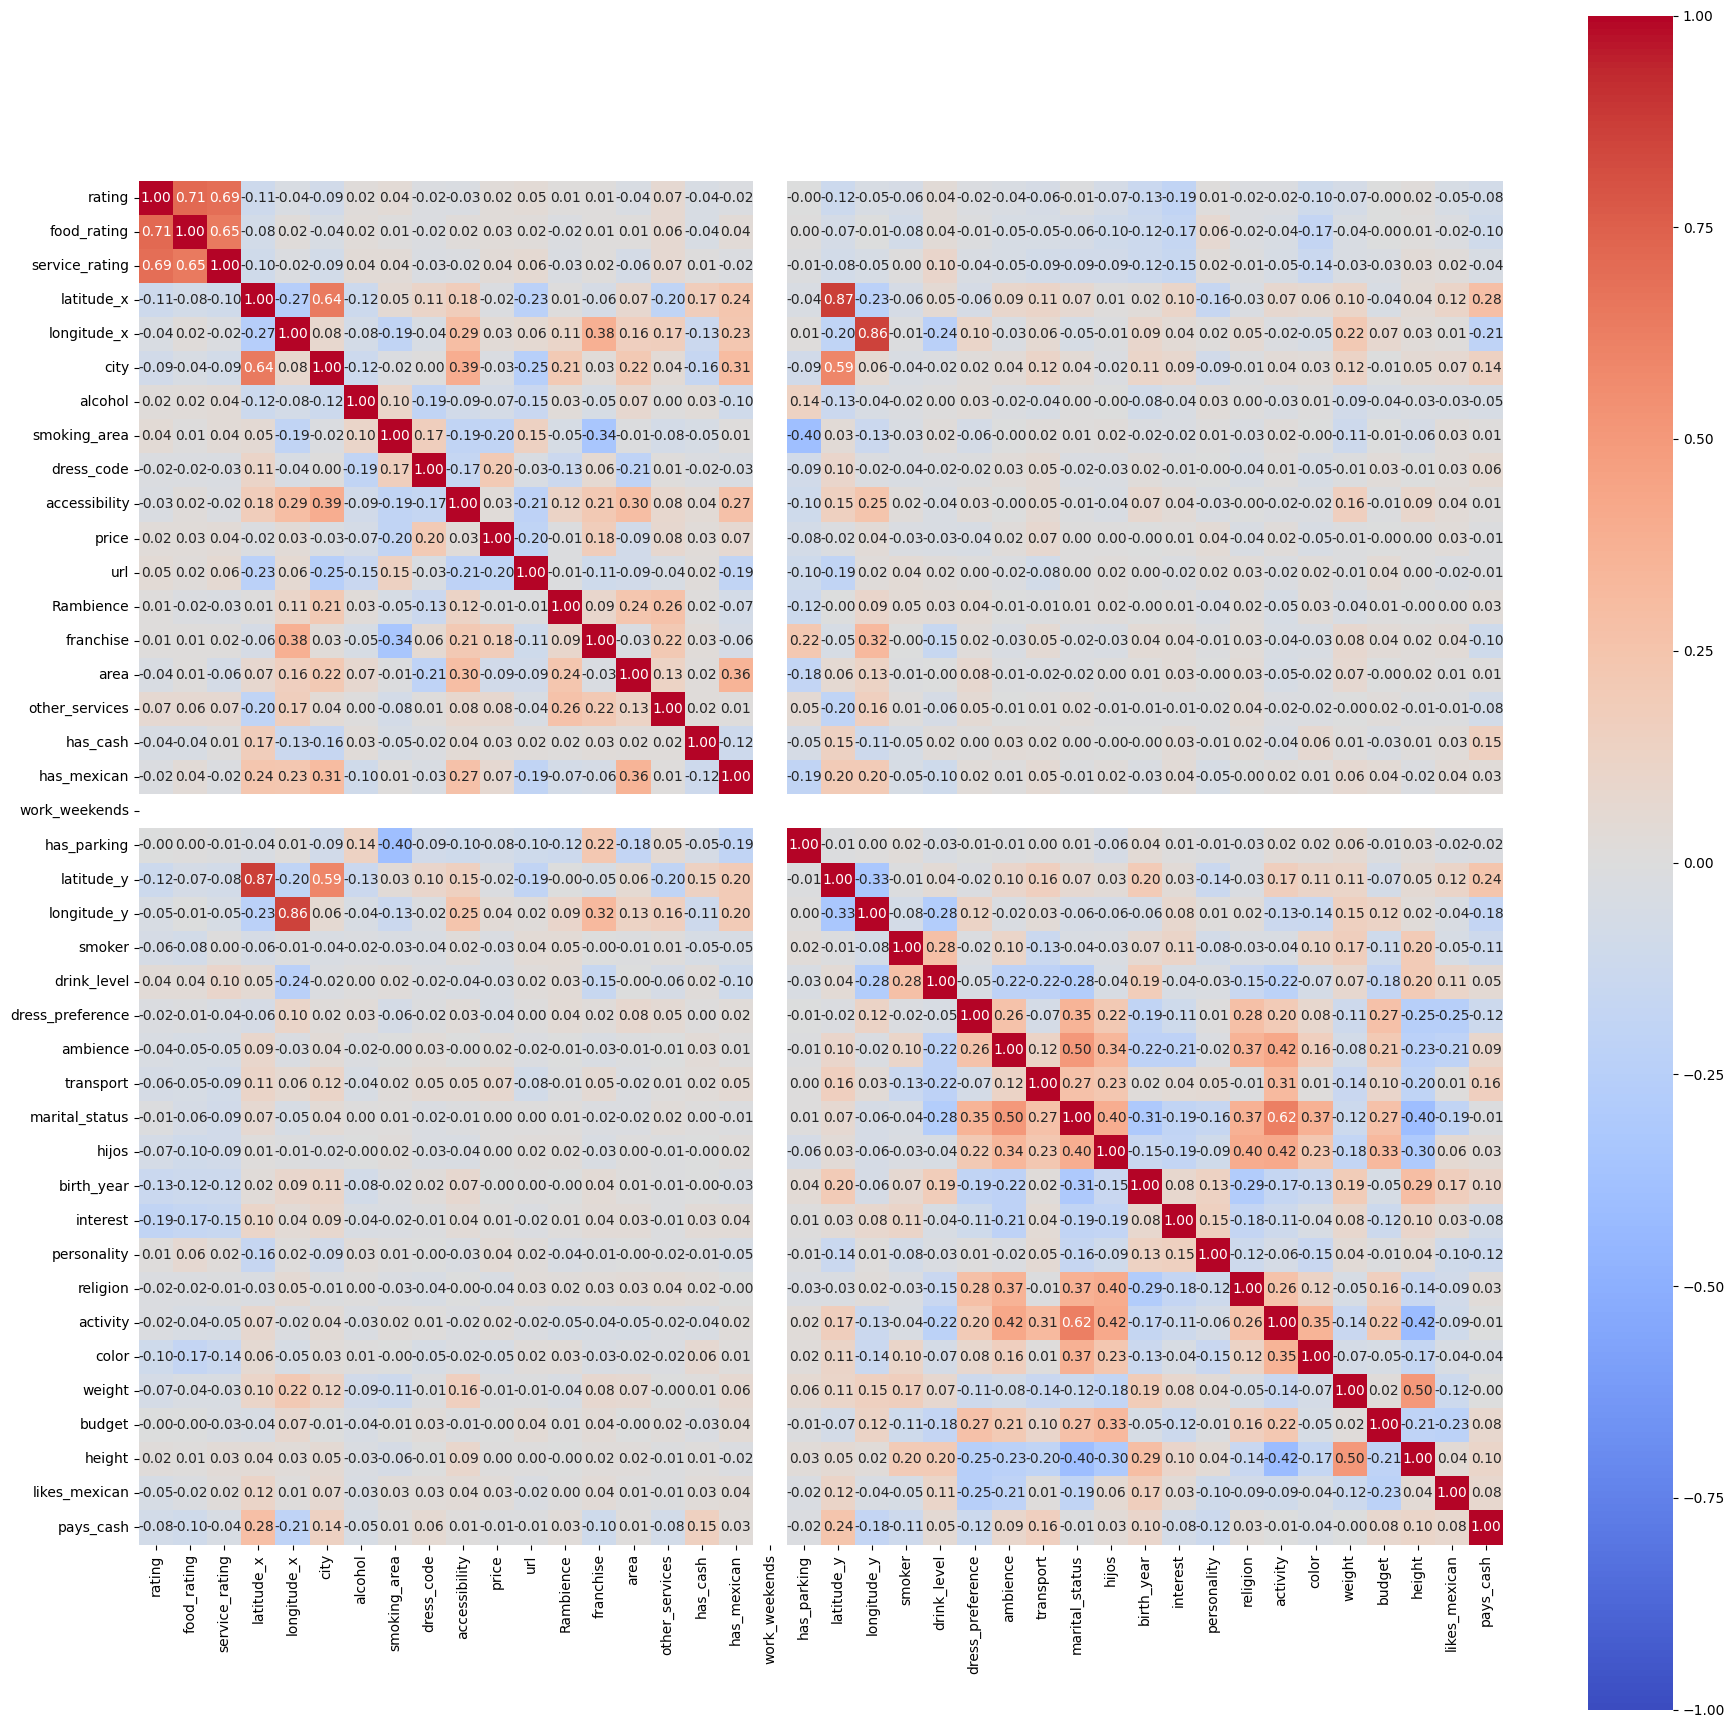

In [75]:
data = rating.merge(resData, on="placeID", how="left").merge(userData, on="userID", how="left")

plt.figure(figsize=(22, 22))
sns.heatmap(data.drop(["placeID", "userID"], axis=1).corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f", square=True)

Видим высокую зависимость между latitude_x, longitude_x и latitude_y, longitude_y - координатами ресторана и координатами посетителя

# Создание модели

In [76]:
data["has_cash"] = data["has_cash"].fillna(data["has_cash"].mode()[0])
data["has_mexican"] = data["has_mexican"].fillna(data["has_mexican"].mode()[0])
data["work_weekends"] = data["work_weekends"].fillna(data["work_weekends"].mode()[0])
data["smoker"] = data["smoker"].fillna(data["smoker"].mode()[0])
data["pays_cash"] = data["pays_cash"].fillna(data["pays_cash"].mode()[0])

/tmp/ipykernel_26351/3518172212.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["has_cash"] = data["has_cash"].fillna(data["has_cash"].mode()[0])
/tmp/ipykernel_26351/3518172212.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["has_mexican"] = data["has_mexican"].fillna(data["has_mexican"].mode()[0])
/tmp/ipykernel_26351/3518172212.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavio

$R^2$ - коэффициент детерминации. Показывает, какая доля изменчивости целевой переменной объясняется моделью. Значение близкое к 1 говорит о достаточно высокой точности модели.  
MSE (mean squared error) - средняя квадратичная ошибка. Показывает, насколько предсказанные значения отличаются от реальных  
Accuracy - точность измерений. Показывает, насколько близка модель к реальным данным. $Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

## Linear Regression

In [103]:
X = data.drop(["userID", "placeID", "rating", "food_rating", "service_rating"], axis=1)
Y = data[["rating", "food_rating", "service_rating"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8, random_state=42)

In [104]:
stats = pd.DataFrame(columns=["degree", "r2", "mse"])
for degree in [1, 2, 3, 4]:
    poly_features =  PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression().fit(X_train_poly, Y_train)
    r2 = model.score(X_test_poly, Y_test)
    mse = mean_squared_error(Y_test, model.predict(X_test_poly))
    stats.loc[len(stats)] = [ degree, r2, mse ]

In [105]:
stats

,degree,r2,mse
0,1.0,1.061221e-01,5.272677e-01
1,2.0,-7.376306e+03,4.161923e+03
2,3.0,-1.914706e+06,1.151117e+06
3,4.0,-1.208389e+06,7.270107e+05


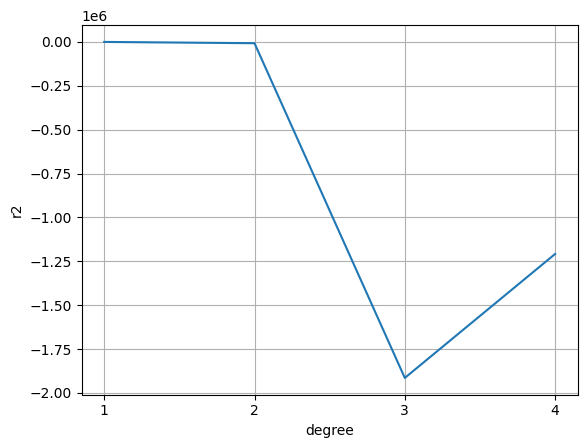

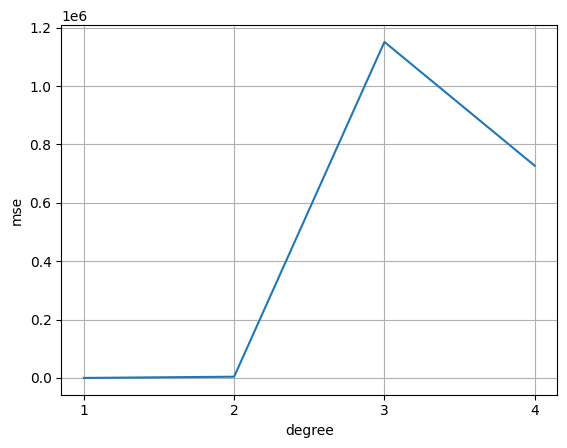

In [108]:
plt.grid()
plt.xticks(stats["degree"])
sns.lineplot(stats, x="degree", y="r2")
plt.show()

plt.grid()
plt.xticks(stats["degree"])
sns.lineplot(stats, x="degree", y="mse")
plt.show()

## Logistic Regression

In [98]:
X = data.drop(["userID", "placeID", "rating", "food_rating", "service_rating"], axis=1)
Y = data[["rating", "food_rating", "service_rating"]].sum(axis=1)

stats = pd.DataFrame(columns=["cutoff", "acc", "mse"])

for cutoff in np.linspace(Y.min(), Y.max(), 50, endpoint=False):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y > cutoff, train_size=.8, random_state=42)

    model = LogisticRegression(random_state=42, max_iter=2000).fit(X_train, Y_train)

    acc = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_test, model.predict(X_test))
    stats.loc[len(stats)] = [ cutoff, acc, mse ]

stats

/home/ramil/Documents/Study/ML/spbu_ml_2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ramil/Documents/Study/ML/spbu_ml_2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

,cutoff,acc,mse
0,0.00,0.841202,0.158798
1,0.12,0.841202,0.158798
2,0.24,0.841202,0.158798
3,0.36,0.841202,0.158798
4,0.48,0.841202,0.158798
5,0.60,0.841202,0.158798
6,0.72,0.841202,0.158798
7,0.84,0.841202,0.158798
8,0.96,0.841202,0.158798
9,1.08,0.836910,0.163090


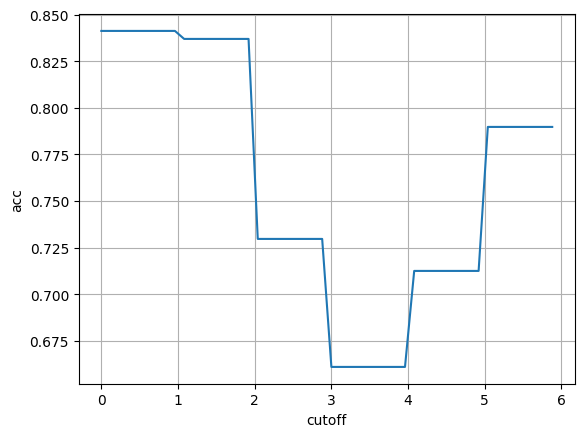

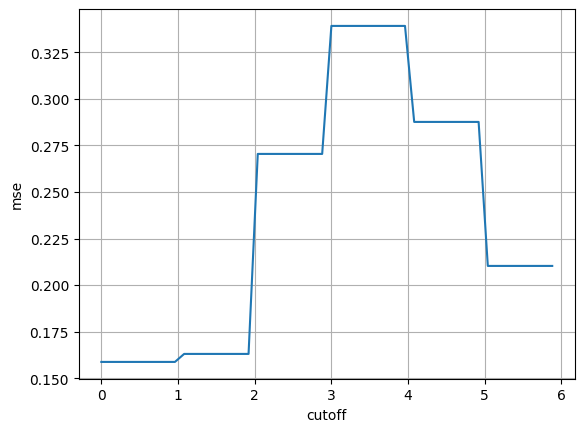

In [101]:
plt.grid()
sns.lineplot(stats, x="cutoff", y="acc")
plt.show()

plt.grid()
sns.lineplot(stats, x="cutoff", y="mse")
plt.show()

## Decision Tree Classifier

In [96]:
X = data.drop(["userID", "placeID", "rating", "food_rating", "service_rating"], axis=1)
Y = data[["rating", "food_rating", "service_rating"]].sum(axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8, random_state=42)
stats = pd.DataFrame(columns=["depth", "acc", "mse"])

for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=42, max_depth=depth, )
    model.fit(X_train, Y_train)

    acc = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_test, model.predict(X_test))
    stats.loc[len(stats)] = [ depth, acc, mse ]

stats

,depth,acc,mse
0,1.0,0.236052,5.562232
1,2.0,0.266094,10.944206
2,3.0,0.266094,10.768240
3,4.0,0.296137,10.613734
4,5.0,0.283262,9.446352
5,6.0,0.304721,7.510730
6,7.0,0.321888,6.914163
7,8.0,0.412017,5.772532
8,9.0,0.407725,4.296137
9,10.0,0.403433,5.025751


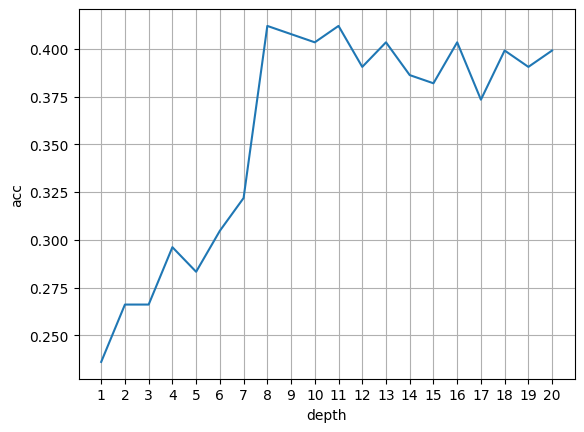

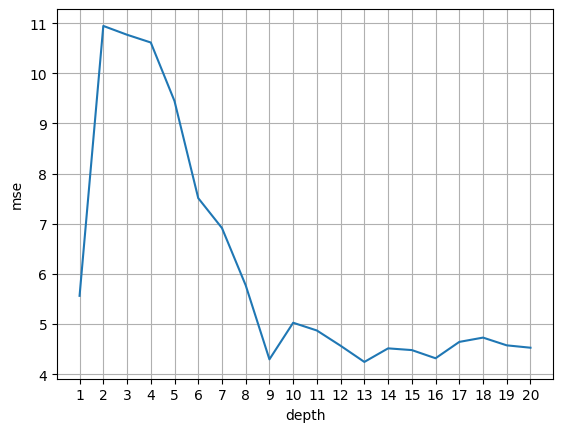

In [95]:
plt.xticks(stats["depth"])
plt.grid()
sns.lineplot(stats, x="depth", y="acc")
plt.show()

plt.xticks(stats["depth"])
plt.grid()
sns.lineplot(stats, x="depth", y="mse")
plt.show()